In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras_tuner as kt

In [63]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full),(X_test,y_test) = cifar10.load_data()

In [64]:
X_train_full.shape

(50000, 32, 32, 3)

In [65]:
X_test.shape

(10000, 32, 32, 3)

In [66]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

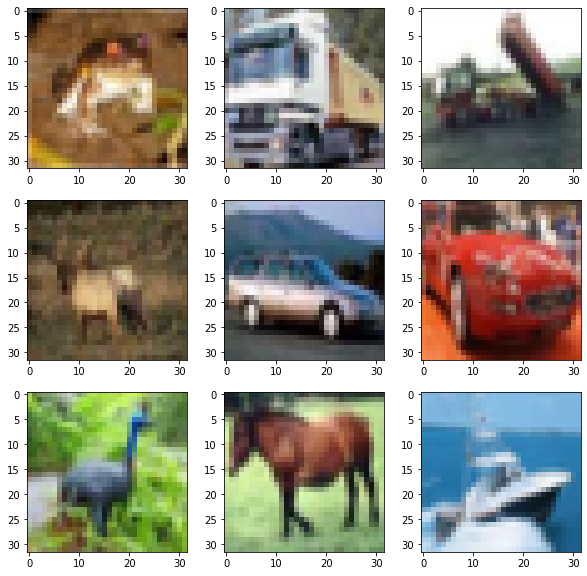

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [68]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [69]:
class_names[y_train_full[8][0]]

'ship'

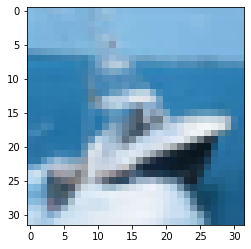

In [70]:
plt.imshow(X_train_full[8], cmap=plt.get_cmap('gray'))

In [71]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [72]:
X_train[0]

array([[[0.23529412, 0.32156863, 0.21176471],
        [0.15686275, 0.26666667, 0.14117647],
        [0.20392157, 0.31764706, 0.20392157],
        ...,
        [0.20784314, 0.16862745, 0.19607843],
        [0.25882353, 0.21568627, 0.23921569],
        [0.28627451, 0.24313725, 0.26666667]],

       [[0.43921569, 0.44705882, 0.44705882],
        [0.22745098, 0.27843137, 0.21960784],
        [0.22745098, 0.31764706, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490196],
        [0.28235294, 0.24313725, 0.27058824]],

       [[0.66666667, 0.63137255, 0.69803922],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.31372549, 0.34901961, 0.29019608],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.2745098 , 0.24705882, 0.2745098 ],
        [0.28235294, 0.25098039, 0.27843137]],

       ...,

       [[0.35686275, 0.44313725, 0.36862745],
        [0.23137255, 0.3254902 , 0.24313725],
        [0.17647059, 0

In [73]:
# def exponential_decay(epoch):
#         return 0.01*0.1**(epoch/10)
    
# exponential_decay_fn = exponential_decay
# lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [94]:
def create_model(neurons1, neurons2, lr):
    model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[32,32,3]),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(neurons1, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(neurons2, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(10, activation = "softmax")
      ])
    
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model(hp):
    neurons1 = hp.Int("units1", min_value=32, max_value=512, step=32)
    neurons2 = hp.Int("units2", min_value=32, max_value=512, step=32)
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")

    model = create_model(
        neurons1=neurons1, neurons2=neurons2, lr=lr
    )
    return model
    

In [95]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    overwrite=True)

In [96]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)


Trial 10 Complete [00h 00m 57s]
val_loss: 1.826662302017212

Best val_loss So Far: 1.8133180141448975
Total elapsed time: 00h 15m 33s
INFO:tensorflow:Oracle triggered exit


In [105]:
best_model = tuner.get_best_models()[0]
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


print(best_hps.get('units1'))
print(best_hps.get('units2'))
print(best_hps.get('learning_rate'))

best_model.summary()

32
320
0.01
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                98336     
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               10560     
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)    

In [75]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[32,32,3]),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(10, activation = "softmax")
      ])
        

In [76]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [109]:
history = best_model.fit(X_train, y_train, epochs=60, validation_data = (X_valid, y_valid), batch_size=32)


Epoch 1/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8932 - accuracy: 0.3111 - val_loss: 1.8036 - val_accuracy: 0.3686
Epoch 2/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8754 - accuracy: 0.3195 - val_loss: 1.8510 - val_accuracy: 0.3552
Epoch 3/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8696 - accuracy: 0.3188 - val_loss: 1.9381 - val_accuracy: 0.3322
Epoch 4/60
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8581 - accuracy: 0.3249 - val_loss: 1.8053 - val_accuracy: 0.3768
Epoch 5/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8460 - accuracy: 0.3280 - val_loss: 1.7914 - val_accuracy: 0.3770
Epoch 6/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8454 - accuracy: 0.3298 - val_loss: 1.7686 - val_accuracy: 0.3904
Epoch 7/60
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8377 - accuracy: 0.3312 - val_loss: 1.7738 - val_accuracy

1407/1407 [==============================] - 5s 4ms/step - loss: 1.7064 - accuracy: 0.3827 - val_loss: 1.6178 - val_accuracy: 0.4460
Epoch 58/60
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7061 - accuracy: 0.3841 - val_loss: 1.6262 - val_accuracy: 0.4352
Epoch 59/60
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7054 - accuracy: 0.3810 - val_loss: 1.5908 - val_accuracy: 0.4452
Epoch 60/60
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6998 - accuracy: 0.3833 - val_loss: 1.6109 - val_accuracy: 0.4418


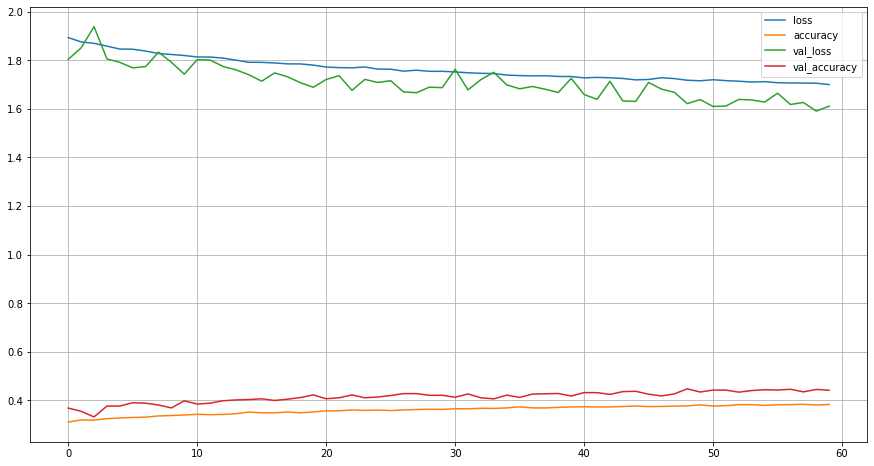

In [110]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [112]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.6085 - accuracy: 0.4445


[1.6085388660430908, 0.44449999928474426]

In [87]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([3, 8, 8, ..., 3, 6, 7])

In [88]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

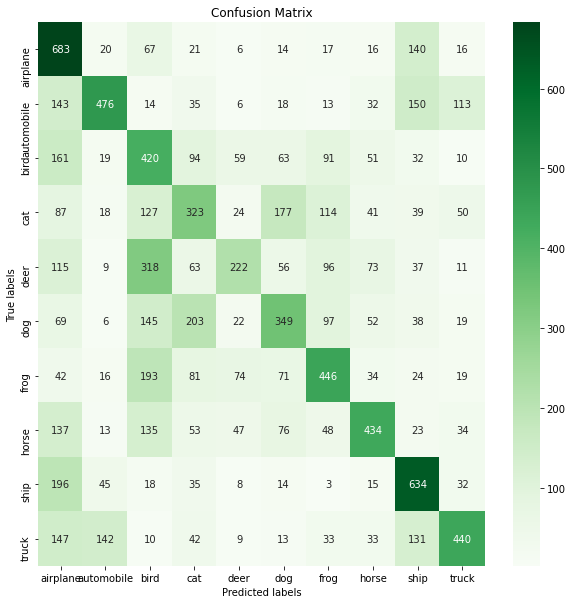

In [89]:
import seaborn as sb    

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()